In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Bigmart Sales Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Bigmart Sales Prediction\Test.csv')
print('train: ',train.shape)
print('test: ', test.shape)

train:  (8523, 14)
test:  (5681, 11)


In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [4]:
train.drop(['Unnamed: 12','Unnamed: 13'], axis = 1, inplace=True)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train['source']='train'
test['source']='test'

In [8]:
df_main = pd.concat([test,train], ignore_index=True)

In [9]:
df = pd.DataFrame(df_main)
#df = pd.concat([train,test], ignore_index=True)

In [10]:
print(df.shape)
df.head()

(14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
1,Regular,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store,test
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test


In [11]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [12]:
df.apply(lambda df:len(df.unique()))

Item_Fat_Content                 3
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    9007
Regular    5019
low fat     178
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Fat_Content'].replace('low fat', value='Low Fat', inplace=True)
print(df['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [15]:
print(df['Item_Type'].value_counts())
print()
print(df['Outlet_Establishment_Year'].value_counts())
print()
print(df['Outlet_Location_Type'].value_counts())
print()
print(df['Outlet_Size'].value_counts())
print()
print(df['Outlet_Type'].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [16]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)
# This is done because the two variables have no direct relation with the sales

In [17]:
df.shape

(14204, 11)

In [18]:
df.isnull().sum()

Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [19]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace = True)
# Filling missing values using median because numeric

In [20]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)
# Filling missing values using mode because categorical

In [21]:
df.isnull().sum()

Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [22]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [23]:
df['Item_Visibility'].replace(0 , value=0.065953 , inplace = True)
# This is done because Visibility cannot be Zero
# Here, we have taken the mean value

In [24]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [25]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [26]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [27]:
print(df.shape)
df.head()

(14204, 12)


,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,107.8622,NaN,Snack Foods,0.007565,20.750,1999,Tier 1,Medium,Supermarket Type1,test,14
1,Regular,87.3198,NaN,Dairy,0.038428,8.300,2007,Tier 2,Medium,Supermarket Type1,test,6
2,Low Fat,241.7538,NaN,Others,0.099575,14.600,1998,Tier 3,Medium,Grocery Store,test,15
3,Low Fat,155.0340,NaN,Snack Foods,0.015388,7.315,2007,Tier 2,Medium,Supermarket Type1,test,6
4,Regular,234.2300,NaN,Dairy,0.118599,12.600,1985,Tier 3,Medium,Supermarket Type3,test,28


In [28]:
df.drop(['Outlet_Establishment_Year'], axis = 1 , inplace = True)

In [29]:
print(df.shape)
df.head()

(14204, 11)


,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,107.8622,NaN,Snack Foods,0.007565,20.750,Tier 1,Medium,Supermarket Type1,test,14
1,Regular,87.3198,NaN,Dairy,0.038428,8.300,Tier 2,Medium,Supermarket Type1,test,6
2,Low Fat,241.7538,NaN,Others,0.099575,14.600,Tier 3,Medium,Grocery Store,test,15
3,Low Fat,155.0340,NaN,Snack Foods,0.015388,7.315,Tier 2,Medium,Supermarket Type1,test,6
4,Regular,234.2300,NaN,Dairy,0.118599,12.600,Tier 3,Medium,Supermarket Type3,test,28


In [30]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [31]:
# Get the first two characters of ID then map them with Item_Type
df['Item_Type_Combined'] = df_main['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [32]:
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,Low Fat,107.8622,NaN,Snack Foods,0.007565,20.750,Tier 1,Medium,Supermarket Type1,test,14,Food
1,Regular,87.3198,NaN,Dairy,0.038428,8.300,Tier 2,Medium,Supermarket Type1,test,6,Food
2,Low Fat,241.7538,NaN,Others,0.099575,14.600,Tier 3,Medium,Grocery Store,test,15,Non-Consumable
3,Low Fat,155.0340,NaN,Snack Foods,0.015388,7.315,Tier 2,Medium,Supermarket Type1,test,6,Food
4,Regular,234.2300,NaN,Dairy,0.118599,12.600,Tier 3,Medium,Supermarket Type3,test,28,Food


In [33]:
df.drop(['Item_Type'], axis=1, inplace=True)
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined
0,Low Fat,107.8622,NaN,0.007565,20.750,Tier 1,Medium,Supermarket Type1,test,14,Food
1,Regular,87.3198,NaN,0.038428,8.300,Tier 2,Medium,Supermarket Type1,test,6,Food
2,Low Fat,241.7538,NaN,0.099575,14.600,Tier 3,Medium,Grocery Store,test,15,Non-Consumable
3,Low Fat,155.0340,NaN,0.015388,7.315,Tier 2,Medium,Supermarket Type1,test,6,Food
4,Regular,234.2300,NaN,0.118599,12.600,Tier 3,Medium,Supermarket Type3,test,28,Food


In [34]:
df.shape

(14204, 11)

In [35]:
df = df.rename(columns = {'Item_Type_Combined':'New_Item_Type'})

In [36]:
df.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'source', 'Outlet_Years', 'New_Item_Type'],
      dtype='object')

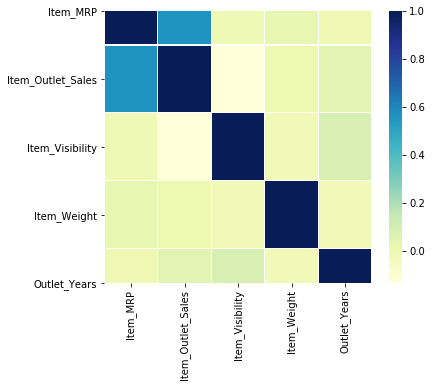

In [37]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

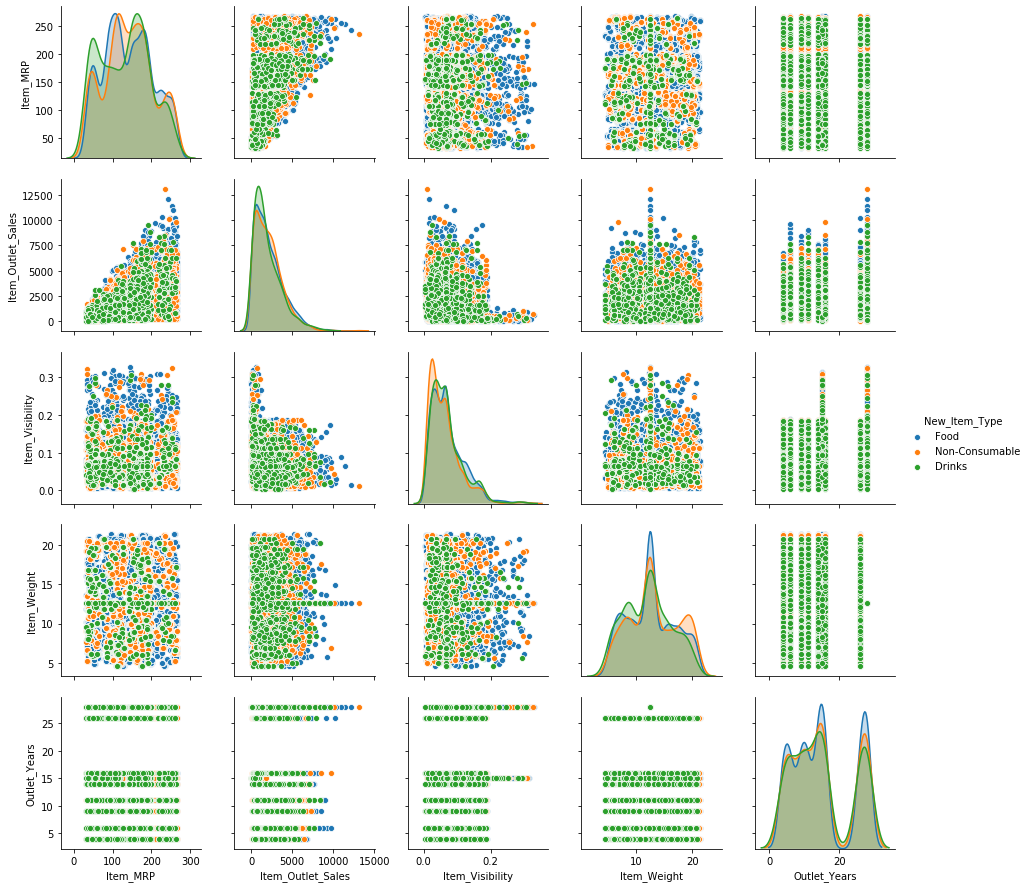

In [38]:
sns.pairplot(df, hue='New_Item_Type')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8764CF08>,
      dtype=object)

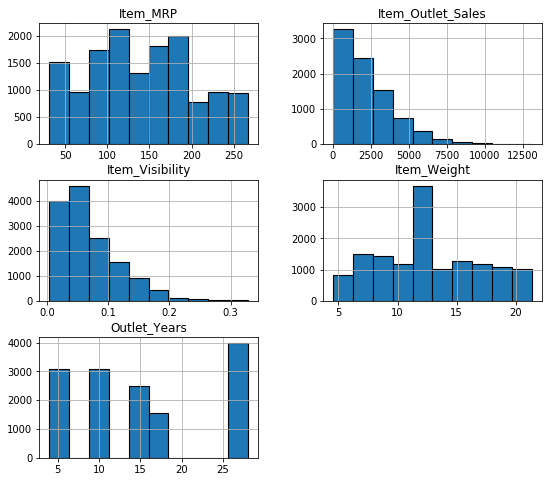

In [39]:
df.hist(edgecolor='black', linewidth=1.1, figsize=(9,8))

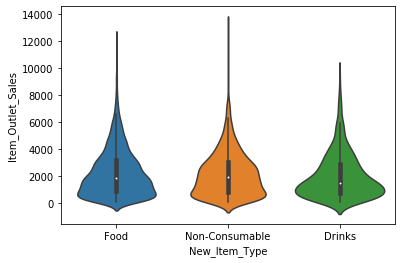

In [40]:
sns.violinplot(data=df , x="New_Item_Type", y='Item_Outlet_Sales')

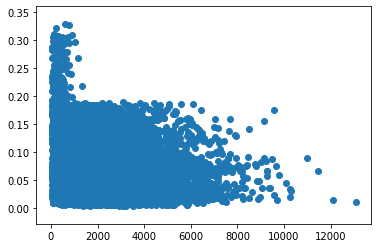

In [41]:
plt.scatter(x=df['Item_Outlet_Sales'], y=df['Item_Visibility'])

In [42]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
colname

['Item_Fat_Content',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source',
 'New_Item_Type']

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df[j] = le.fit_transform(df[j].astype(str))

In [ ]:
df.dtypes

In [ ]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [ ]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)